In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans,BisectingKMeans,Birch
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score

In [2]:
input_file = "clean_end_date.xlsx"
df = pd.read_excel(input_file)

In [3]:
df.head()

,region,system,parameter,units,health_guideline,aesthetic_guideline,average_value,health_compliance,disinfection,end_date,Comment,LastDate
0,Eyre,Coffin Bay,Alkalinity,mg/L,NG,NG,237.0000,NaN,Chlorine,2022-02-28,NaN,2022-02-28
1,Eyre,Coffin Bay,Aluminium - acid soluble,mg/L,NG,≤ 0.2,0.0010,NaN,Chlorine,2022-02-28,NaN,2022-02-28
2,Eyre,Coffin Bay,Antimony,mg/L,≤ 0.003,NG,0.0005,100%,Chlorine,2022-02-28,NaN,2022-02-28
3,Eyre,Coffin Bay,Arsenic,mg/L,≤ 0.01,NG,0.0008,100%,Chlorine,2022-02-28,NaN,2022-02-28
4,Eyre,Coffin Bay,Barium,mg/L,≤ 2,NG,0.0167,100%,Chlorine,2022-02-28,NaN,2022-02-28


In [4]:
df = df.drop(columns=['aesthetic_guideline','units','Comment'])
df = df[df['health_compliance'] != 'NG']

In [5]:
def convert_percentage_to_decimal(percentage):
    if isinstance(percentage, str) and '%' in percentage:
        return float(percentage.strip('%')) / 100
    else:
        return percentage

# Apply the function to the 'health_compliance' column
df['health_compliance'] = df['health_compliance'].apply(convert_percentage_to_decimal)
df['average_value'] = df.groupby('parameter')['average_value'].transform(lambda x: x.fillna(x.mean()))
df['health_compliance'] = df.groupby('parameter')['health_compliance'].transform(lambda x: x.fillna(x.mean()))

In [6]:
df = df.dropna(subset=['health_compliance'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111651 entries, 2 to 229770
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   region             111651 non-null  object        
 1   system             111651 non-null  object        
 2   parameter          111651 non-null  object        
 3   health_guideline   111651 non-null  object        
 4   average_value      111651 non-null  float64       
 5   health_compliance  111651 non-null  float64       
 6   disinfection       111541 non-null  object        
 7   end_date           110479 non-null  datetime64[ns]
 8   LastDate           110479 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), object(5)
memory usage: 8.5+ MB


In [7]:
df.system.unique()
df_sorted = df.sort_values(by=['LastDate', 'region', 'system'])
df.LastDate.unique()

output_file_sorted = 'sorted_clean_data.xlsx'
df_sorted.to_excel(output_file_sorted, index=False)


<Figure size 1200x800 with 0 Axes>

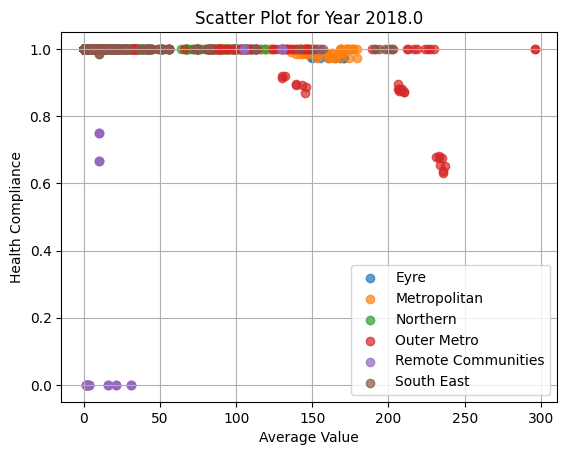

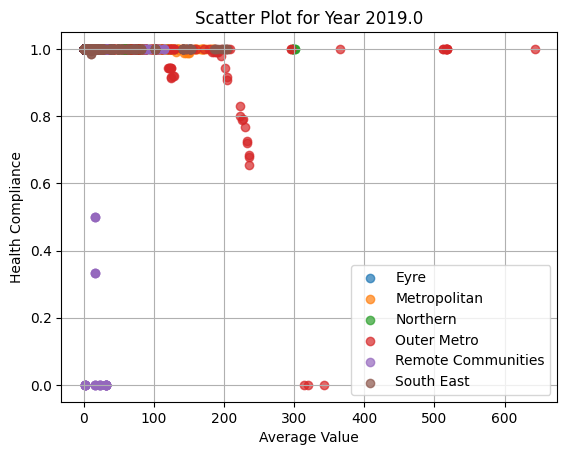

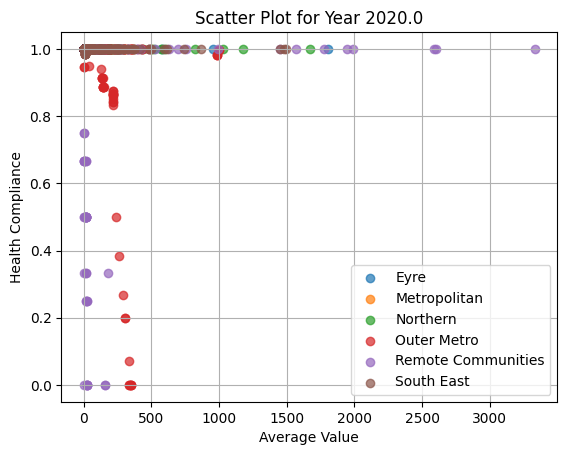

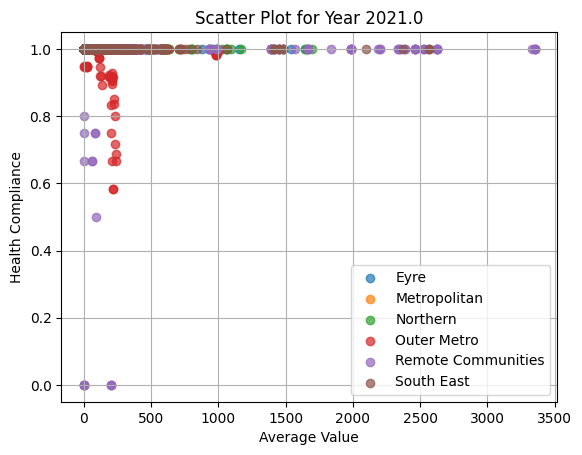

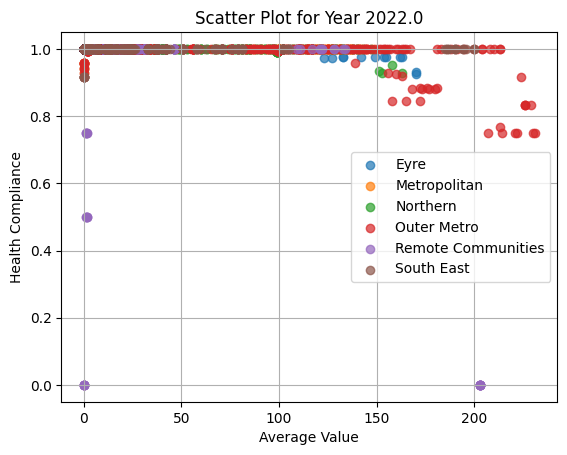

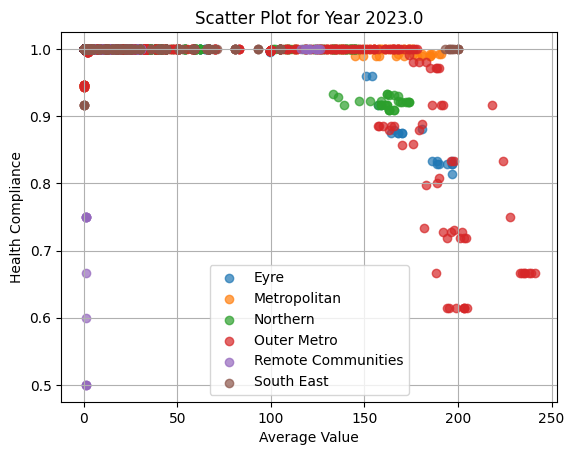

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


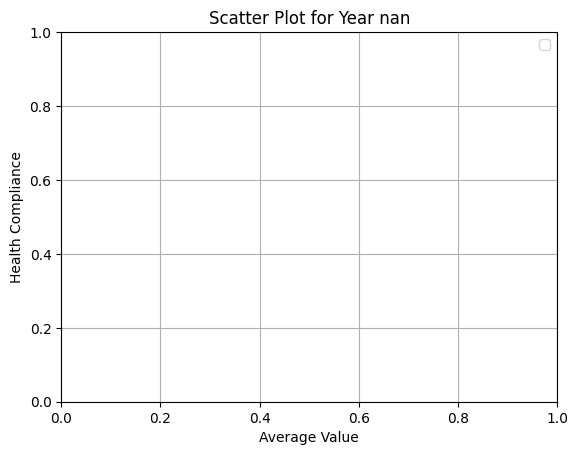

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df_sorted with the necessary data

# Extracting year from LastDate
df_sorted['Year'] = df_sorted['LastDate'].dt.year

# Grouping by region and year
grouped = df_sorted.groupby(['region', 'Year'])

# Create separate scatter plots for each year
years = df_sorted['Year'].unique()

plt.figure(figsize=(12, 8))

for year in years:
    plt.figure()
    plt.title(f'Scatter Plot for Year {year}')
    plt.xlabel('Average Value')
    plt.ylabel('Health Compliance')
    
    for name, group in grouped:
        if year in group['Year'].values:
            year_data = group[group['Year'] == year]
            plt.scatter(
                year_data['average_value'],
                year_data['health_compliance'],
                label=name[0],  # Region name
                alpha=0.7
            )
    
    plt.legend()
    plt.grid(True)
    plt.show()


In [9]:
# Assuming you have a DataFrame named df_sorted with the necessary data

# Sorting the DataFrame by year and average_value
sorted_df = df_sorted.sort_values(['Year', 'average_value'], ascending=[True, False])

# Grouping by year and displaying the top three parameters for each year
top_three_per_year = sorted_df.groupby('Year').head(3)[['Year', 'parameter', 'average_value']]

print("Top three parameters with the highest average value for each year:")
print(top_three_per_year)


Top three parameters with the highest average value for each year:
          Year                 parameter  average_value
59149   2018.0                 Manganese          296.0
199682  2018.0                 Manganese          296.0
59102   2018.0           Trihalomethanes          237.0
206198  2019.0                 Manganese          643.0
25541   2019.0                 Manganese          518.0
206087  2019.0                 Manganese          518.0
179318  2020.0                    Copper         3332.0
179018  2020.0  Nitrate + nitrite as NO3         2603.0
178966  2020.0  Nitrate + nitrite as NO3         2585.0
43272   2021.0                    Copper         3352.0
219401  2021.0                    Copper         3352.0
85932   2021.0                    Copper         3352.0
109824  2022.0    Trihalomethanes (THMs)          231.0
98671   2022.0    Trihalomethanes (THMs)          230.0
69712   2022.0    Trihalomethanes (THMs)          229.0
160376  2023.0    Trihalomethanes (TH

In [10]:
# Assuming you have a DataFrame named df_sorted with the necessary data

# Filter the DataFrame for rows where region is "Remote Community" and system is "Watinuma" and parameter is "Copper"
copper_remote_watinuma = df_sorted[
    (df_sorted['region'] == 'Remote Communities') &
    (df_sorted['system'] == 'Watinuma') &
    (df_sorted['parameter'] == 'Copper')
]

print("Copper data in Remote Community with system name Watinuma:")
print(copper_remote_watinuma)


Copper data in Remote Community with system name Watinuma:
                    region    system parameter health_guideline  \
179318  Remote Communities  Watinuma    Copper              ≤ 2   
170432  Remote Communities  Watinuma    Copper              ≤ 2   
123876  Remote Communities  Watinuma    Copper              ≤ 2   
7585    Remote Communities  Watinuma    Copper              ≤ 2   
12055   Remote Communities  Watinuma    Copper              ≤ 2   
43272   Remote Communities  Watinuma    Copper              ≤ 2   
219401  Remote Communities  Watinuma    Copper              ≤ 2   
85932   Remote Communities  Watinuma    Copper              ≤ 2   
92685   Remote Communities  Watinuma    Copper              ≤ 2   
174892  Remote Communities  Watinuma    Copper              ≤ 2   
65804   Remote Communities  Watinuma    Copper              ≤ 2   
210482  Remote Communities  Watinuma    Copper              ≤ 2   
52238   Remote Communities  Watinuma    Copper              ≤ 2   
769

In [11]:
# Assuming you have a DataFrame named df_sorted with the necessary data

# Filter the DataFrame for rows where region is "Remote Communities", system is "Watinuma", and parameter is "Copper"
copper_remote_watinuma = df_sorted[
    (df_sorted['region'] == 'Remote Communities') &
    (df_sorted['system'] == 'Watinuma') &
    (df_sorted['parameter'] == 'Copper')
]

# Sort the filtered DataFrame by date
copper_remote_watinuma_sorted = copper_remote_watinuma.sort_values('end_date')

print("Copper data in Remote Communities with system name Watinuma sorted by date and health compliance:")
print(copper_remote_watinuma_sorted[['end_date', 'average_value', 'health_compliance']])


Copper data in Remote Communities with system name Watinuma sorted by date and health compliance:
         end_date  average_value  health_compliance
179318 2020-10-31      3332.0000                1.0
170432 2020-11-30         0.3332                1.0
123876 2020-12-31         0.3332                1.0
7585   2021-01-31      3332.0000                1.0
12055  2021-02-28         0.3352                1.0
43272  2021-03-31      3352.0000                1.0
219401 2021-04-30      3352.0000                1.0
85932  2021-05-31      3352.0000                1.0
92685  2021-06-30         0.3352                1.0
174892 2021-07-31      3352.0000                1.0
65804  2021-08-31         0.3352                1.0
210482 2021-09-30         0.3352                1.0
52238  2021-10-31         0.3352                1.0
76912  2021-11-30         0.3352                1.0
119456 2021-12-31         0.3352                1.0
190583 2022-01-31         0.3352                1.0
20866  2022-05-31 

In [12]:
# Assuming you have a DataFrame named df_sorted with the necessary data

# Grouping by year and selecting the top three unique parameters for each year
top_three_per_year = df_sorted.groupby('Year').apply(lambda x: x.nlargest(3, 'average_value')['parameter'].unique()).reset_index()

print("Top three different parameters with the highest average value for each year:")
print(top_three_per_year)


Top three different parameters with the highest average value for each year:
     Year                                   0
0  2018.0        [Manganese, Trihalomethanes]
1  2019.0                         [Manganese]
2  2020.0  [Copper, Nitrate + nitrite as NO3]
3  2021.0                            [Copper]
4  2022.0            [Trihalomethanes (THMs)]
5  2023.0            [Trihalomethanes (THMs)]


In [13]:
# Assuming you have a DataFrame named df_sorted with the necessary data

# Filter the DataFrame for rows where parameter is 'Copper'
copper_values = df_sorted[df_sorted['parameter'] == 'Copper'][['Year', 'region', 'system', 'average_value']]

# Calculate the average value of copper for each year, region, and system
average_copper_per_year_region_system = copper_values.groupby(['Year', 'region', 'system'])['average_value'].mean()

# Find the highest value of copper for each year, region, and system
highest_copper_per_year_region_system = copper_values.groupby(['Year', 'region', 'system'])['average_value'].max().sort_values(ascending=False)

print("Highest copper value for each year, region, and system (sorted):")
print(highest_copper_per_year_region_system)


Highest copper value for each year, region, and system (sorted):
Year    region              system      
2021.0  Remote Communities  Watinuma        3352.0000
2020.0  Remote Communities  Watinuma        3332.0000
2021.0  South East          Naracoorte      2569.0000
        Remote Communities  Murputja        2465.0000
2020.0  Remote Communities  Oak Valley      1986.0000
                                              ...    
2022.0  Northern            Woolpunda          0.0014
2023.0  Northern            Woolpunda          0.0013
2021.0  Remote Communities  Kalka              0.0007
2022.0  Remote Communities  Kalka              0.0007
2023.0  Northern            Leigh Creek        0.0006
Name: average_value, Length: 336, dtype: float64


In [14]:
# Assuming you have a DataFrame named df_sorted with the necessary data

# Extracting year from LastDate
df_sorted['Year'] = df_sorted['LastDate'].dt.year

# Grouping by year and counting unique parameters
parameters_count_yearly = df_sorted.groupby('Year')['parameter'].nunique()

print(parameters_count_yearly)


Year
2018.0    10
2019.0    10
2020.0    42
2021.0    36
2022.0    36
2023.0    36
Name: parameter, dtype: int64


In [15]:
# Assuming you have a DataFrame named df_sorted with the necessary data

# Filter the DataFrame for rows where parameter is not null
filtered_data = df_sorted[df_sorted['parameter'].notnull()]

# Group by year and count unique parameters for each year
parameters_added_counts_per_year = filtered_data.groupby('Year')['parameter'].agg(['nunique', lambda x: ', '.join(x.unique())])

# Reset index to turn the groupby result into a DataFrame
parameters_added_counts_per_year.reset_index(inplace=True)
parameters_added_counts_per_year.columns = ['Year', 'Parameter Count', 'Unique Parameters']

# Export the result to an Excel file
parameters_added_counts_per_year.to_excel('parameters_added_per_year.xlsx', index=False)


In [16]:
# Assuming you have a DataFrame named df_sorted with the necessary data

# Extracting year from LastDate
df_sorted['Year'] = df_sorted['LastDate'].dt.year

# Grouping by year and counting unique systems
systems_count_yearly = df_sorted.groupby('Year')['system'].nunique()

print(systems_count_yearly)


Year
2018.0     89
2019.0     89
2020.0    103
2021.0     88
2022.0     87
2023.0     88
Name: system, dtype: int64


In [17]:
# Assuming you have a DataFrame named df_sorted with the necessary data

# Filter the DataFrame for rows where parameter is 'Copper' and 'average_value' > 2 and 'health_compliance' is 1 or 100%
copper_high_health = df_sorted[
    (df_sorted['parameter'] == 'Copper') &
    (df_sorted['average_value'] > 2) &
    (df_sorted['health_compliance'].isin([1, '100%']))
]

# Normalize 'average_value' if conditions are met
df_sorted.loc[
    (df_sorted.index.isin(copper_high_health.index)) &
    (df_sorted['average_value'] > 1), 'average_value'
] /= 10

print("Updated 'df_sorted' with normalized 'average_value' of Copper where 'average_value' > 2 and 'health_compliance' is 1 or 100%:")
print(df_sorted[['end_date', 'average_value', 'health_compliance']])


Updated 'df_sorted' with normalized 'average_value' of Copper where 'average_value' > 2 and 'health_compliance' is 1 or 100%:
         end_date  average_value  health_compliance
93895  2018-05-31       1.000000                1.0
93897  2018-05-31      10.194227                1.0
93898  2018-05-31       1.300000                1.0
93902  2018-05-31       0.001000                1.0
93908  2018-05-31      10.000000                1.0
...           ...            ...                ...
140526        NaT       2.000000                1.0
140529        NaT       7.000000                1.0
140531        NaT      21.000000                1.0
140534        NaT       8.000000                1.0
140538        NaT      55.000000                1.0

[111651 rows x 3 columns]


In [18]:
# Assuming you have a DataFrame named df_sorted with the necessary data

# Filter the DataFrame for rows where parameter is 'Copper'
copper_values = df_sorted[df_sorted['parameter'] == 'Copper'][['Year', 'region', 'system', 'average_value', 'health_compliance']]

# Calculate the average value of copper for each year, region, and system
average_copper_per_year_region_system = copper_values.groupby(['Year', 'region', 'system', 'health_compliance'])['average_value'].mean()

# Find the highest value of copper for each year, region, and system
highest_copper_per_year_region_system = copper_values.groupby(['Year', 'region', 'system', 'health_compliance'])['average_value'].max().sort_values(ascending=False)

print("Highest copper value for each year, region, and system (sorted):")
print(highest_copper_per_year_region_system)


Highest copper value for each year, region, and system (sorted):
Year    region              system        health_compliance
2021.0  Remote Communities  Watinuma      1.0                  335.2000
2020.0  Remote Communities  Watinuma      1.0                  333.2000
2021.0  South East          Naracoorte    1.0                  256.9000
        Remote Communities  Murputja      1.0                  246.5000
2020.0  Remote Communities  Oak Valley    1.0                  198.6000
                                                                 ...   
2022.0  Northern            Woolpunda     1.0                    0.0014
2023.0  Northern            Woolpunda     1.0                    0.0013
2021.0  Remote Communities  Kalka         1.0                    0.0007
2022.0  Remote Communities  Kalka         1.0                    0.0007
2023.0  Northern            Leigh Creek   1.0                    0.0006
Name: average_value, Length: 336, dtype: float64


In [19]:
# Assuming you have a DataFrame named df_sorted with the necessary data

# Clean 'health_guideline' column by converting non-numeric values to NaN
df_sorted['health_guideline'] = pd.to_numeric(df_sorted['health_guideline'], errors='coerce')

# Filter the DataFrame for rows where 'average_value' > 'health_guideline' and 'health_compliance' is 1 or 100%
items_above_guideline = df_sorted[
    (df_sorted['average_value'] > df_sorted['health_guideline']) &
    (df_sorted['health_compliance'].isin([1, '100%']))
]

print("Items with 'average_value' > 'health_guideline' (cleaned) and 'health_compliance' is 1 or 100%:")
print(items_above_guideline)


Items with 'average_value' > 'health_guideline' (cleaned) and 'health_compliance' is 1 or 100%:
            region              system               parameter  \
93897         Eyre          Coffin Bay                 E. coli   
93922         Eyre            Elliston                 E. coli   
93947         Eyre          Eyre South                 E. coli   
93972         Eyre  Eyre South/Morgan                  E. coli   
93997         Eyre       Morgan / Eyre                 E. coli   
...            ...                 ...                     ...   
33167   South East           Tarpeena   Residual Free Chlorine   
140526  South East           Tarpeena                 Fluoride   
140529  South East           Tarpeena             Lead - Total   
140531  South East           Tarpeena                Manganese   
140534  South East           Tarpeena   Residual Free Chlorine   

        health_guideline  average_value  health_compliance disinfection  \
93897               0.00      10.194

In [20]:
# Assuming you have a DataFrame named df_sorted with the necessary data

# Clean 'health_guideline' column by converting non-numeric values to NaN
df_sorted['health_guideline'] = pd.to_numeric(df_sorted['health_guideline'], errors='coerce')

# Filter the DataFrame for rows where 'average_value' > 'health_guideline' and 'health_compliance' is 1 or 100%
items_above_guideline = df_sorted[
    (df_sorted['average_value'] > df_sorted['health_guideline']) &
    (df_sorted['health_compliance'].isin([1, '100%']))
]

# Group by 'parameter' and count occurrences
summary = items_above_guideline.groupby('parameter').agg({
    'average_value': 'count'  # Count occurrences of 'average_value'
})

summary.to_excel('summary.xlsx')
print("Summary with count of occurrences for parameters breaking the rule:")
print(summary)


Summary with count of occurrences for parameters breaking the rule:
                         average_value
parameter                             
E. coli                           2466
Fluoride                          1090
Lead                               314
Lead - Total                      1075
Manganese                          782
Residual Free Chlorine             813
Residual Monochloramine            168
Residual Total Chlorine            902


In [21]:

# Sorting the DataFrame by year and average_value
sorted_df = df_sorted.sort_values(['Year', 'average_value'], ascending=[True, False])

# Grouping by year and displaying the top three parameters for each year
top_three_per_year = sorted_df.groupby('Year').head(3)[['Year', 'parameter', 'average_value']]

print("Top three parameters with the highest average value for each year:")
print(top_three_per_year)

Top three parameters with the highest average value for each year:
          Year                 parameter  average_value
59149   2018.0                 Manganese          296.0
199682  2018.0                 Manganese          296.0
59102   2018.0           Trihalomethanes          237.0
206198  2019.0                 Manganese          643.0
25541   2019.0                 Manganese          518.0
206087  2019.0                 Manganese          518.0
179018  2020.0  Nitrate + nitrite as NO3         2603.0
178966  2020.0  Nitrate + nitrite as NO3         2585.0
178999  2020.0  Nitrate + nitrite as NO3         1946.0
7442    2021.0  Nitrate + nitrite as NO3         2623.0
43129   2021.0  Nitrate + nitrite as NO3         2623.0
219258  2021.0  Nitrate + nitrite as NO3         2623.0
109824  2022.0    Trihalomethanes (THMs)          231.0
98671   2022.0    Trihalomethanes (THMs)          230.0
69712   2022.0    Trihalomethanes (THMs)          229.0
160376  2023.0    Trihalomethanes (TH

In [23]:
# Assuming you have a DataFrame named df_sorted with the necessary data

# Clean 'health_guideline' column by converting non-numeric values to NaN
df_sorted['health_guideline'] = pd.to_numeric(df_sorted['health_guideline'], errors='coerce')

# Define a function to calculate the rationalized value based on the conditions
def rationalize_value(row):
    if row['health_compliance'] in [1, '100%']:
        ratio = row['average_value'] / row['health_guideline'] if row['health_guideline'] != 0 else 0
        if ratio > 1000:
            return row['average_value'] / 10000
        elif ratio > 100:
            return row['average_value'] / 1000
        elif ratio > 1:
            return row['average_value'] / 10
    return row['average_value']

# Apply the rationalization function to the DataFrame
df_sorted['rationalized_value'] = df_sorted.apply(rationalize_value, axis=1)

# Filter the DataFrame to show rows where rationalization occurred
rationalized_rows = df_sorted[df_sorted['rationalized_value'] != df_sorted['average_value']]

rationalized_rows.to_excel('rationalized_rows.xlsx', index=False)
df_sorted.to_excel('rationalized_data.xlsx', index=False)
print("Rationalized 'average_value' based on specified conditions:")
print(rationalized_rows[['parameter', 'average_value', 'health_guideline', 'health_compliance', 'rationalized_value']])


Rationalized 'average_value' based on specified conditions:
                     parameter  average_value  health_guideline  \
196258                Fluoride           12.0              1.50   
196285                Fluoride            7.0              1.50   
196312                Fluoride            5.0              1.50   
196339                Fluoride            7.0              1.50   
196346  Residual Free Chlorine           13.0              5.00   
...                        ...            ...               ...   
33167   Residual Free Chlorine            9.0              5.00   
140526                Fluoride            2.0              1.50   
140529            Lead - Total            7.0              0.01   
140531               Manganese           21.0              0.50   
140534  Residual Free Chlorine            8.0              5.00   

        health_compliance  rationalized_value  
196258                1.0               1.200  
196285                1.0              